<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Support Vector Regressor

'''
instead of linear reg. 
where we care about distances from the center reg line

here we have a tube like struc.
that means that reg line with a thershold basically a cylinder is allowed but now we care about the values outside this tube

epsilon-Insensitive Tube

It is called Support Vector Regression because the vectors, the data points, dictate how we form this tube
'''

'''
Non-linear SVR

it is more complex to interpret
'''

##Importing the LIbraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Importing The Dataset

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [11]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

##Feature Scaling

In [5]:
#it is needed because the values in Salaries and Level are different in magnitude
#values in level might get neglected completely
X.shape

(10, 1)

In [14]:
y.shape

(10, 1)

In [13]:
y = y.reshape(len(y),1)

In [15]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalery = StandardScaler()
#because the values for scaling each other are too different both cases
#the std and mean values are different for X and y
X = scalerX.fit_transform(X)
y = scalery.fit_transform(y)


In [16]:
#new X 
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [17]:
#new y
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#Training the SVR model on the whole dataset

In [18]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
#Radial Basis Kernel
#taught in further lectures
svr.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#Predicting a new Result

In [22]:
#now we have to descale our scaled variables into the original values to
#get accurate predictions

'''
svr.predict([[6,5]])
originally we used this

the predict method requires us to give the original values in the dataset

there is where the scalerX comes in handy

'''
#Tranforming
original_val_X = scalerX.transform([[6.5]])
#predict
svr_pred_unscaled = svr.predict(original_val_X)

Predicted Salary that is scaled

In [23]:
#we use inverse transform
scalery.inverse_transform(svr_pred_unscaled)

array([170370.0204065])

Now, the value is scaled back to original

#Visualizing the SVR results

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Salary')

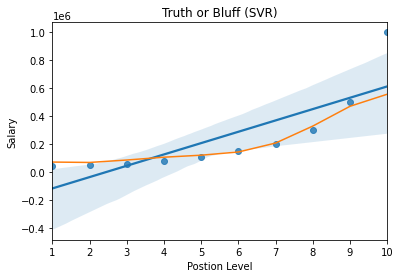

In [25]:
sns.regplot(scalerX.inverse_transform(X),scalery.inverse_transform(y))
plt.plot(scalerX.inverse_transform(X), scalery.inverse_transform(svr.predict(X)))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Postion Level')
plt.ylabel('Salary')

##For Higher resolution and smoother curve

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Salary')

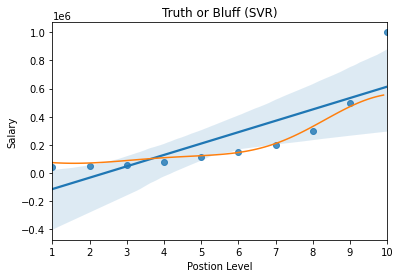

In [36]:
X_grid = np.arange(min(scalerX.inverse_transform(X)),max(scalerX.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
sns.regplot(scalerX.inverse_transform(X),scalery.inverse_transform(y))
plt.plot(X_grid, scalery.inverse_transform(svr.predict(scalerX.transform(X_grid))))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Postion Level')
plt.ylabel('Salary')